In [1]:
import os, shutil
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
config = tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.2))
sess = tf.Session(config=config)
KTF.set_session(sess)

Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
base_dir = './dogImages'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
train_plus_dir=os.path.join(base_dir, 'train_plus2')

# 增强数据集的操作

In [4]:
# if not os.path.exists(train_plus_dir):
#     shutil.copytree(train_dir,train_plus_dir)
# for kind in os.listdir(train_plus_dir):
#     kind_dir=os.path.join(train_plus_dir, kind)
#     if len(os.listdir(kind_dir))*4 < 5*len([x for x in os.listdir(kind_dir) if x.startswith('pic_plus')])+5:
#         continue
#     for pic in os.listdir(kind_dir):
#         pic_dir=os.path.join(kind_dir, pic)
#         if not pic.endswith(".jpg"):
#             continue
#         if pic.startswith('pic_plus'):
#             os.remove(pic_dir)
#             continue
#         print (pic_dir)
#         image = load_img(pic_dir)
#         image = img_to_array(image)
#         image = np.expand_dims(image, axis=0)
#         aug = ImageDataGenerator(rotation_range=30, 
#                                  width_shift_range=0.1,
#                                  height_shift_range=0.1, 
#                                  shear_range=0.1, 
#                                  zoom_range=0.2,
#                                  horizontal_flip=True, 
#                                  fill_mode="nearest")
#         total = 0
#         imageGen = aug.flow(image, batch_size=1, 
#                             save_to_dir=kind_dir,
#                             save_prefix="pic_plus", 
#                             save_format="jpg")
#         print (imageGen)
#         for image in imageGen:
#         # increment our counter
#             total += 1
#             # if we have reached 4 examples, break from the loop
#             if total == 4:
#                 break

In [5]:
train_dir=train_plus_dir

In [6]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(133, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 133)               34181     
Total params: 16,846,277
Trainable params: 16,846,277
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False

In [9]:
from keras import optimizers
# lr: float >= 0. 学习率 Learning rate

# momentum: float >= 0. 参数更新动量 parameter updates momentum

# decay: float >= 0. 学习率每次更新的下降率 Learning rate decay over each update

# nesterov: boolean. 是否应用 Nesterov 动量 whether to apply Nesterov momentum
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')
validation_generator
print(validation_generator.class_indices)
np.save('labels.npy', validation_generator.class_indices) 

Found 33174 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
{'001.Affenpinscher': 0, '002.Afghan_hound': 1, '003.Airedale_terrier': 2, '004.Akita': 3, '005.Alaskan_malamute': 4, '006.American_eskimo_dog': 5, '007.American_foxhound': 6, '008.American_staffordshire_terrier': 7, '009.American_water_spaniel': 8, '010.Anatolian_shepherd_dog': 9, '011.Australian_cattle_dog': 10, '012.Australian_shepherd': 11, '013.Australian_terrier': 12, '014.Basenji': 13, '015.Basset_hound': 14, '016.Beagle': 15, '017.Bearded_collie': 16, '018.Beauceron': 17, '019.Bedlington_terrier': 18, '020.Belgian_malinois': 19, '021.Belgian_sheepdog': 20, '022.Belgian_tervuren': 21, '023.Bernese_mountain_dog': 22, '024.Bichon_frise': 23, '025.Black_and_tan_coonhound': 24, '026.Black_russian_terrier': 25, '027.Bloodhound': 26, '028.Bluetick_coonhound': 27, '029.Border_collie': 28, '030.Border_terrier': 29, '031.Borzoi': 30, '032.Boston_terrier': 31, '033.Bouvier_des_flandres': 32, '034.Boxer

In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 133)


In [12]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from PIL import ImageFile
early_stopping = EarlyStopping(monitor='val_loss',patience=7) 
ImageFile.LOAD_TRUNCATED_IMAGES = True
checkpointer = ModelCheckpoint(filepath='dogskind.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks=[early_stopping,checkpointer], 
      verbose=1)

Epoch 1/100
100/100 [==============================] - 55s 548ms/step - loss: 4.8853 - acc: 0.0190 - val_loss: 4.8129 - val_acc: 0.0227

Epoch 00001: val_loss improved from inf to 4.81294, saving model to dogskind.model.weights.best.hdf5
Epoch 2/100
100/100 [==============================] - 52s 519ms/step - loss: 4.7163 - acc: 0.0480 - val_loss: 4.6774 - val_acc: 0.0432

Epoch 00002: val_loss improved from 4.81294 to 4.67736, saving model to dogskind.model.weights.best.hdf5
Epoch 3/100
100/100 [==============================] - 52s 524ms/step - loss: 4.5590 - acc: 0.0590 - val_loss: 4.4989 - val_acc: 0.0744

Epoch 00003: val_loss improved from 4.67736 to 4.49888, saving model to dogskind.model.weights.best.hdf5
Epoch 4/100
100/100 [==============================] - 51s 509ms/step - loss: 4.3617 - acc: 0.0955 - val_loss: 4.3527 - val_acc: 0.0855

Epoch 00004: val_loss improved from 4.49888 to 4.35270, saving model to dogskind.model.weights.best.hdf5
Epoch 5/100
100/100 [===============

100/100 [==============================] - 52s 516ms/step - loss: 1.7858 - acc: 0.5895 - val_loss: 2.7692 - val_acc: 0.2998

Epoch 00036: val_loss did not improve from 2.76851
Epoch 37/100
100/100 [==============================] - 50s 505ms/step - loss: 1.8378 - acc: 0.5565 - val_loss: 2.7335 - val_acc: 0.3059

Epoch 00037: val_loss improved from 2.76851 to 2.73346, saving model to dogskind.model.weights.best.hdf5
Epoch 38/100
100/100 [==============================] - 50s 503ms/step - loss: 1.8053 - acc: 0.5840 - val_loss: 2.7257 - val_acc: 0.3163

Epoch 00038: val_loss improved from 2.73346 to 2.72573, saving model to dogskind.model.weights.best.hdf5
Epoch 39/100
100/100 [==============================] - 51s 513ms/step - loss: 1.7317 - acc: 0.5920 - val_loss: 2.7030 - val_acc: 0.3166

Epoch 00039: val_loss improved from 2.72573 to 2.70296, saving model to dogskind.model.weights.best.hdf5
Epoch 40/100
100/100 [==============================] - 50s 498ms/step - loss: 1.7124 - acc: 0.

100/100 [==============================] - 55s 545ms/step - loss: 0.9844 - acc: 0.7810 - val_loss: 2.5757 - val_acc: 0.3484

Epoch 00075: val_loss did not improve from 2.53954


In [13]:
history = model.fit_generator(train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks=[early_stopping,checkpointer], 
      verbose=1)

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 1.0209 - acc: 0.7601

KeyboardInterrupt: 

In [14]:
model.load_weights('dogskind.model.weights.best.hdf5')

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.evaluate_generator(test_generator,steps=17, max_queue_size=50, workers=1, use_multiprocessing=True, verbose=0)

Found 836 images belonging to 133 classes.


[2.5728933741064632, 0.3088235329179203]

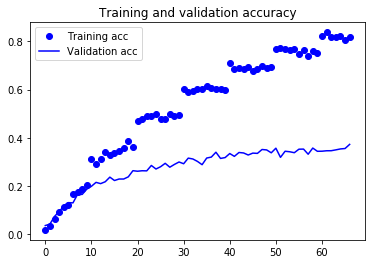

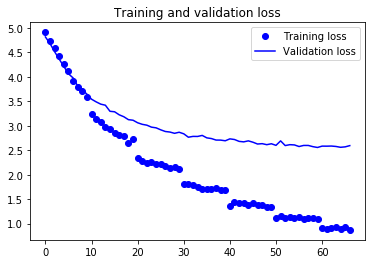

In [15]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
yaml_string = model.to_yaml()
with open('./0cp.yaml', 'w') as outfile:
    outfile.write(yaml_string)